<a href="https://colab.research.google.com/github/yh08037/Introduction-to-Intelligent-Systems/blob/master/HW5_2_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5-2 Principas Component Analasis
## A) Reducing the dimension of som synthetic data
### Loading data and Initialization

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


name_file = "./data_pca.txt"

columns = ['x1', 'x2']

x = np.asarray(pd.read_csv(name_file, names=columns, sep=' '))


I, N = x.shape

P = 1


mu = np.zeros(N)

for i in range(I):
    mu += x[i]
mu = mu / I

x_tilde = np.empty(x.shape)

for i in range(I):
    x_tilde[i] = x[i] - mu
    
    
    
sigma = np.zeros((N, N))

for i in range(I):
    sigma += np.matmul(x_tilde[i].reshape(-1, 1), x_tilde[i].reshape(1, -1))
sigma = sigma / I


eigvals, eigvecs = np.linalg.eig(sigma)


# u : P pricipal eigenvectors
# eigen vectors correspoding to the P highest eigenvalues
u = eigvecs[:, eigvals.argsort()[-P:]]

y = np.empty((I, P))

for i in range(I):
    y[i] = np.asarray([np.dot(u[:, p], x[i]) for p in range(P)])
    

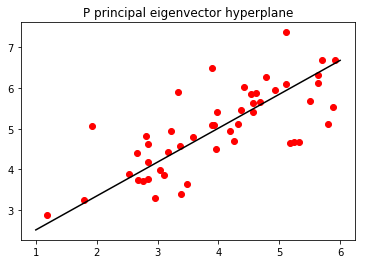

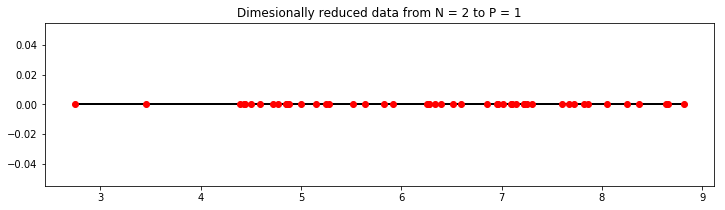

In [50]:
plt.title('P principal eigenvector hyperplane')

plt.plot(x[:,0], x[:,1], "ro")

t = list(range(math.floor(min(x[:, 0])), math.ceil(max(x[:, 0])) + 1))
plt.plot(t, u[1, 0] / u[0, 0] * (t - mu[0]) + mu[1], 'k')

plt.show()

plt.figure(figsize=(12, 3))
plt.title('Dimesionally reduced data from N = 2 to P = 1')
plt.plot(y, np.zeros(y.shape), 'k')
plt.plot(y, np.zeros(y.shape), 'ro')

plt.show()